# Summary statistics

There are many ways you may want to get an overview of your data.

In [1]:
import niimpy
df = niimpy.read_csv(niimpy.sampledata.SCREEN_MONTH, tz='Europe/Helsinki')

## Hourly data
It is easy to get the amount of data in each hour

In [2]:
hourly = df.groupby([df.index.date, df.index.hour]).size()
hourly

2017-03-01  7      6
            8     20
            9     19
            10    12
            11    18
                  ..
2017-03-31  19     6
            20     2
            21    31
            22    11
            23     7
Length: 380, dtype: int64

In [3]:
# The index is the (day, hour) pairs and the
# value is the number at that time
print('%s had %d data points'%(hourly.index[0], hourly.iloc[0]))

(datetime.date(2017, 3, 1), 7) had 6 data points


## Occurance

In niimpy, **occurance** is a way to see the completeness of data.

Occurance is defined as such:
* Divides all time into hours
* Divides all hours into five 12-minute intervals
* Count the number of 12-minute intervals that have data.  This is $occurrence$
* For each hour, report $occurrence$. "5"is taken to mean that data is present somewhat regularly, while "0" means we have no data.

This isn't the perfect measure, but is reasonably effective and simple to calculate.  For data which isn't continuous (like screen data we are actually using), it shows how much the sensor has been used.

Column meanings: `day` is obvious, `hour` is hour of day, `occurrence` is the measure described above, `count` is total number of data points in this hour, `withdata` is which of the 12-min intervals (0-4) have data.

Note that the "uniformly present data" is not true for all data sources.

In [4]:
occurrences = niimpy.util.occurrence(df.index)
occurrences.head()

,day,hour,occurrence
2017-03-01 07:00:00,2017-03-01,7,1
2017-03-01 08:00:00,2017-03-01,8,4
2017-03-01 09:00:00,2017-03-01,9,1
2017-03-01 10:00:00,2017-03-01,10,5
2017-03-01 11:00:00,2017-03-01,11,2


In [5]:
occ_pivot = occurrences.pivot('hour', 'day')

AttributeError: module 'matplotlib.pyplot' has no attribute 'xticklabels'

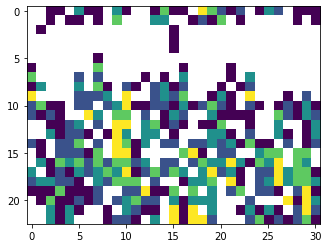

In [6]:
from matplotlib import pyplot
ax = pyplot.imshow(occ_pivot)
pyplot.xticklabels(occ_pivot.index)